In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = "../data/componentes"

with open(f'{path}/autovectores_pca.csv', 'r') as f:
    autovalores = np.array([float(x) for x in f.readline().split()])
    autovectores = np.array([np.array([float(x) for x in line.split()]) for line in f.readlines()])

lists = []
with open(f'{path}/media_desviacion_pca.txt', 'r') as f:  # replace 'file.txt' with your file pat
    array_string = ""
    for line in f:
        stripped_line = line.strip()
        if stripped_line.startswith('['):
            array_string += stripped_line[1:] + " "
        elif stripped_line.endswith(']'):
            array = np.fromstring(array_string, sep=' ')
            lists.append(array.tolist())
            array_string = ""
        else:
            array_string += stripped_line + " "

mean = np.array(lists[0] + [0.29, 0.29])
sd = np.array(lists[1] + [0.17, 0.17])

# Implementacion PCA

In [33]:
# PCA proper
def imagen_a_componentes(imagenes, k):
    coordenadas_componentes = []

    for imagen in imagenes:
        coordenadas = np.array([np.dot((imagen - mean) / sd, autovectores[i]) for i in range(k)])

        coordenadas_componentes.append(coordenadas)

    return coordenadas_componentes

def componentes_a_imagen(coordenadas_componentes):
    imagen = np.zeros(len(autovectores[0]))

    for i in range(len(coordenadas_componentes)):
        imagen += autovectores[i] * coordenadas_componentes[i]

    return imagen * sd + mean

def porcentaje_varianza(cant_componentes):
    suma_aval = sum(np.abs(autovalores)[:410])
    
    suma_aval_hasta_comp = sum(np.abs(autovalores[: cant_componentes]))

    return round(100 * suma_aval_hasta_comp / suma_aval, 2)


### Ver Eigenfaces

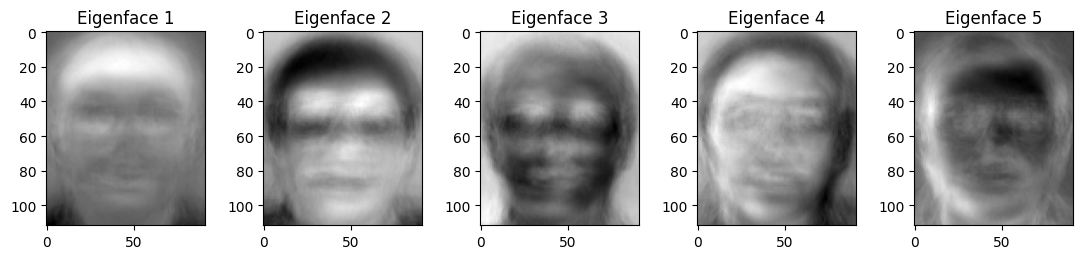

In [34]:
cant_eigenfaces = 5

f, axarr = plt.subplots(1, cant_eigenfaces, figsize=(11, 11))

f.tight_layout()

for i in range(cant_eigenfaces):
    axarr[i].imshow((autovectores[i]).reshape((56 * 2, 46 * 2)), cmap='gray')
    axarr[i].title.set_text(f'Eigenface {i + 1}')

### Reconstruir imagenes

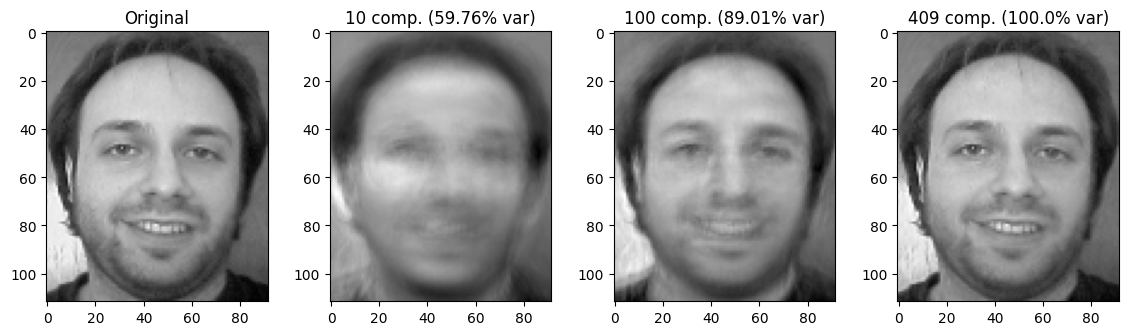

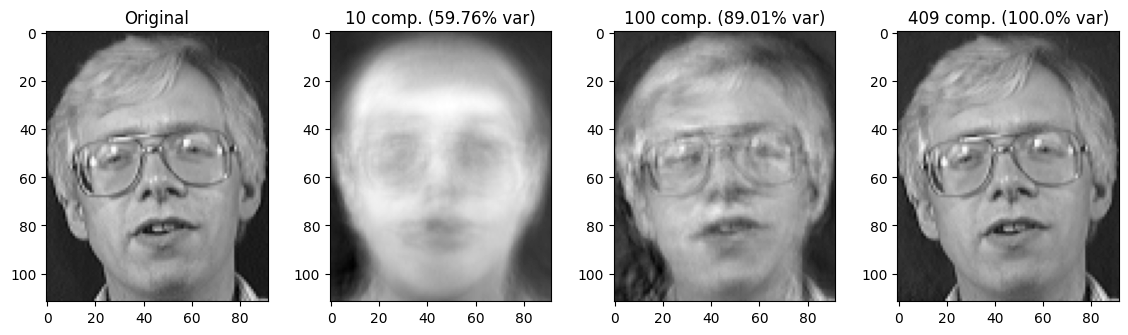

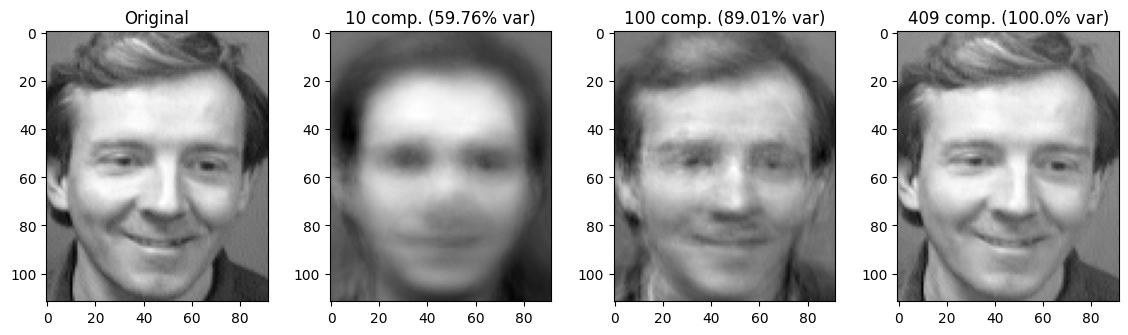

In [35]:
def load_imagen(indice_persona, indice_imagen):
    matriz_imagen = plt.imread(f"../data/caras/s{indice_persona}/{indice_imagen}.pgm") / 255

    return matriz_imagen.flatten(), matriz_imagen

def ver_pca(indice_persona, indice_imagen):
    cant_componentes = [10, 100, 409]

    f, axarr = plt.subplots(1, len(cant_componentes) + 1, figsize=(11.5, 11.5))

    f.tight_layout()

    imagen_test = load_imagen(indice_persona, indice_imagen)
    axarr[0].imshow(imagen_test[1], cmap='gray')
    axarr[0].title.set_text('Original')

    imagen_menor_dimension = imagen_a_componentes([imagen_test[0]], 30)[0]
    imagen_reconstruida = componentes_a_imagen(imagen_menor_dimension)

    for i in range(len(cant_componentes)):
        imagen_menor_dimension = imagen_a_componentes([imagen_test[0]], cant_componentes[i])[0]
        imagen_reconstruida = componentes_a_imagen(imagen_menor_dimension)

        axarr[i + 1].imshow(imagen_reconstruida.reshape((56 * 2, 46 * 2)), cmap='gray')
        axarr[i + 1].title.set_text(f'{cant_componentes[i]} comp. ({porcentaje_varianza(cant_componentes[i])}% var)')

    plt.show()

ver_pca(1, 1)
ver_pca(2, 1)
ver_pca(3, 1)

### Grafico autovalores

A partir del autovalor 409 pegan un decrecimiento de orden a 10^-7, por lo que el algoritmo (que funciona a una precision de 10^-6) no puede asegurar que ese sea una buena aproximacion al autovalor. Comparando con numpy este retorna un autovalor de 2.39543975e-15 en el indice 410. Si bien no podemos asegurar que los autovectores a partir de 409 sean correctos, si podemos asegurar que los primeros 409 autovectores abarcan virtualmente el 100% de la varianza de las imagenes.

Text(0.5, 0, 'Componente')

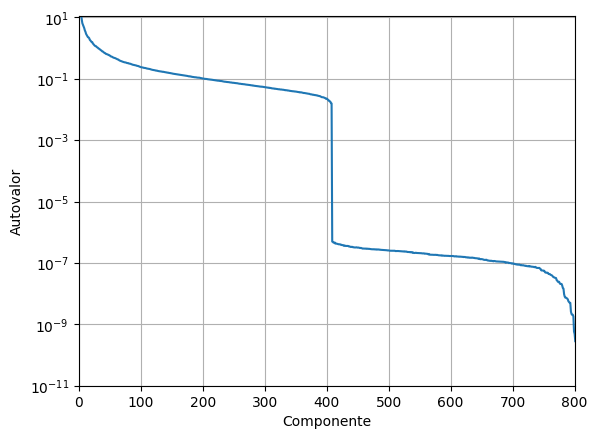

In [37]:
plt.plot(abs(autovalores))
plt.xlim(0, 800)
plt.ylim(10 ** (-11), 11)
plt.grid()
plt.yscale('log')
plt.ylabel('Autovalor')
plt.xlabel('Componente')